In [1]:
import pandas as pd

In [2]:
tweet_data = pd.read_csv(open('bitcoin_tweets1000000.csv', errors='ignore'))

/tmp/ipykernel_3871/3669675782.py:1: DtypeWarning: Columns (0,5,6,7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_data = pd.read_csv(open('bitcoin_tweets1000000.csv', errors='ignore'))


In [53]:
tweet_data_sampled = tweet_data[:70000]

In [54]:
tweet_data_sampled

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleanText,Polarity Score,sentiment
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.000000,0.0
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take friend leowandersleb btc w...,0.000000,0.0
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,guys evening read article btc would like share,0.000000,0.0
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price bitcoin btc crypto,0.000000,0.0
4,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured nodes today soon biggest bears...,-0.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,Crypto_alert,Slovenská republika,NaN,2019-02-20 06:27:47,27.0,281.0,688.0,False,2021-04-06 10:07:33,#BTC outflow from Gemini exchanage\n#Bitcoin #...,"['BTC', 'Bitcoin', 'BTC', 'Gemini']",Twitter Web App,False,btc outflow gemini exchanage bitcoin btc gemini,0.000000,0.0
69996,69996,Ozza,#Bitcoin #Binance,Crypto trader / Investor / life coach / Eco...,2021-03-15 09:31:48,149.0,303.0,1037.0,False,2021-04-06 10:06:18,$WIN\n\nTarget 1 $0.010🚀🚀\n\nTarget 2 $1.000🚀🚀...,"['Binance', 'bitcoin', 'btc']",Twitter for Android,False,win target target binance bitcoin btc,0.800000,1.0
69997,69997,Bitcoin Mate (BTC News App),NaN,Your BTC and crypto mate available FREE on Goo...,2015-03-08 06:31:18,4062.0,1972.0,201.0,False,2021-04-06 10:06:06,Nexo faces lawsuit for liquidating $5M in clie...,"['btc', 'bitcoinnews', 'bitcoin']",Twibble.io,False,nexo faces lawsuit liquidating client collater...,0.000000,0.0
69998,69998,Whale Transactions,NaN,Always on Whale Watch. $BTC $ETH,2021-02-08 19:58:44,187.0,5.0,0.0,False,2021-04-06 10:06:03,🚨🐋 THERE WAS A LARGE BITCOIN (618.95672109 BTC...,NaN,NaN,False,large bitcoin btc transaction hash bcbfddaadcb...,0.214286,1.0


In [55]:
tweet_data_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        70000 non-null  object 
 1   user_name         69999 non-null  object 
 2   user_location     39032 non-null  object 
 3   user_description  64932 non-null  object 
 4   user_created      70000 non-null  object 
 5   user_followers    70000 non-null  object 
 6   user_friends      70000 non-null  object 
 7   user_favourites   70000 non-null  object 
 8   user_verified     70000 non-null  object 
 9   date              70000 non-null  object 
 10  text              70000 non-null  object 
 11  hashtags          54265 non-null  object 
 12  source            67207 non-null  object 
 13  is_retweet        69999 non-null  object 
 14  cleanText         69998 non-null  object 
 15  Polarity Score    70000 non-null  float64
 16  sentiment         70000 non-null  float6

In [56]:
#tomorrow isolate date and time to create time series

In [61]:
columns = ['Unnamed: 0', 'user_name', 'user_location','user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites','user_verified', 'text', 'hashtags', 'source', 'is_retweet', 'cleanText', 'Polarity Score']
sentiment_and_date = tweet_data.drop(columns, axis=1)

In [177]:
sentiment_and_date[["date"]] = sentiment_and_date[["date"]].apply(lambda x: pd.to_datetime(x, errors ='coerce'))
sentiment_and_date['sentiment'].value_counts()

0.0    527050
1.0    472936
Name: sentiment, dtype: int64

In [63]:
#sentiment_and_date[["date"]].apply(lambda x: pd.to_datetime(x, format = "%Y/%m/%d"))

In [172]:
#sentiment_and_date[['date']] = pd.DataFrame(sentiment_and_date['date'].dt.date)
df

,date,sentiment
0,2021-02-05,0.351240
1,2021-02-06,0.342587
2,2021-02-07,0.371617
3,2021-02-08,0.374535
4,2021-02-09,0.380690
...,...,...
67,2021-08-17,0.505360
68,2021-08-18,0.507646
69,2021-08-19,0.494382
70,2021-08-20,0.483339


In [67]:
sentiment_and_date['date'] = sentiment_and_date['date'].dt.date

In [183]:
df = sentiment_and_date.groupby('date').sum()
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       72 non-null     datetime64[ns]
 1   sentiment  72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [184]:
crypto_df = pd.read_csv('BTC-USD.csv')
crypto_df.drop(['Open','High','Low','Close'],axis=1, inplace=True)
crypto_df[['date']] = crypto_df[['Date']]
crypto_df

,Date,Adj Close,Volume,date
0,2021-02-05,38144.308594,58598066402,2021-02-05
1,2021-02-06,39266.011719,71326033653,2021-02-06
2,2021-02-07,38903.441406,65500641143,2021-02-07
3,2021-02-08,46196.464844,101467222687,2021-02-08
4,2021-02-09,46481.105469,91809846886,2021-02-09
...,...,...,...,...
193,2021-08-17,44695.359375,33451362600,2021-08-17
194,2021-08-18,44801.187500,32194123075,2021-08-18
195,2021-08-19,46717.578125,37204312299,2021-08-19
196,2021-08-20,49339.175781,34706867452,2021-08-20


In [185]:
crypto_df[["date"]] = crypto_df[["date"]].apply(lambda x: pd.to_datetime(x, errors ='coerce'))
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       198 non-null    object        
 1   Adj Close  198 non-null    float64       
 2   Volume     198 non-null    int64         
 3   date       198 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.3+ KB


In [186]:
merged_df = crypto_df.merge(df, on='date', how='inner')

In [187]:
correct_indexes

[]

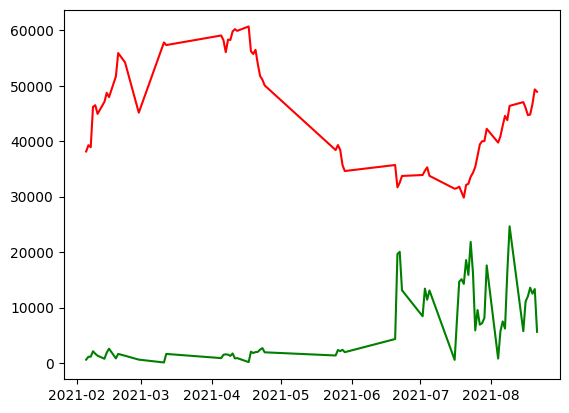

In [188]:
import matplotlib.pyplot as plt
import numpy as np
# ax = df.plot.bar(rot=20, figsize=(20,10))
# ax2= crypto_df.plot.bar(x='Date',y='Volume')
#plt.xticks(np.arange(0, len(df) + 1, 5))
x = merged_df['date']
a = merged_df['Adj Close']
c = merged_df['sentiment']


plt.plot(x, a, 'r') # plotting t, a separately 
plt.plot(x, c, 'g') # plotting t, c separately 

In [ ]:
# sentiment_ts = TimeSeries.from_dataframe(sentiment_and_date)

# # Visualize the time series
# sentiment_ts.plot()

# # Apply a forecasting model to the time series
# from darts.models import ExponentialSmoothing

# model = ExponentialSmoothing()
# model.fit(sentiment_ts)
# forecast = model.predict(n=30)

# # Visualize the forecast
# forecast.plot()

#datetime.strptime(now, "%Y-%m-%d %H:%M:%S")

# p = now.date().isoformat()
# # produces a string in ISO8601 format
# now.date().isoformat()
# # does the same, but just for the date portion

# tomorrow = now + datetime.timedelta(hours=8)
# tomorrow.isoformat("T", "milliseconds")+('Z')
# p